In [1]:
from pandas import read_csv
filename='https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data'
names=['BI-RADS','Age','Shape','Margin','Density','Severity']
mammographic=read_csv(filename, names=names) 
print(mammographic.shape)


(961, 6)


In [2]:
print(mammographic.head(20))

   BI-RADS Age Shape Margin Density  Severity
0        5  67     3      5       3         1
1        4  43     1      1       ?         1
2        5  58     4      5       3         1
3        4  28     1      1       3         0
4        5  74     1      5       ?         1
5        4  65     1      ?       3         0
6        4  70     ?      ?       3         0
7        5  42     1      ?       3         0
8        5  57     1      5       3         1
9        5  60     ?      5       1         1
10       5  76     1      4       3         1
11       3  42     2      1       3         1
12       4  64     1      ?       3         0
13       4  36     3      1       2         0
14       4  60     2      1       2         0
15       4  54     1      1       3         0
16       3  52     3      4       3         0
17       4  59     2      1       3         1
18       4  54     1      1       3         1
19       4  40     1      ?       ?         0


In [3]:
print(mammographic.groupby('Severity').size())

Severity
0    516
1    445
dtype: int64


In [4]:
print(mammographic.describe())

         Severity
count  961.000000
mean     0.463059
std      0.498893
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


In [5]:
print(mammographic.dtypes)

BI-RADS     object
Age         object
Shape       object
Margin      object
Density     object
Severity     int64
dtype: object


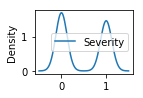

In [6]:
from matplotlib import pyplot 
mammographic.plot(kind='density',subplots=True,layout=(3,3)) 
pyplot.show()

In [7]:
import pandas as pd
mammographic_new=mammographic.replace('?',pd.np.nan)
print(mammographic_new.head(30))

   BI-RADS Age Shape Margin Density  Severity
0        5  67     3      5       3         1
1        4  43     1      1     NaN         1
2        5  58     4      5       3         1
3        4  28     1      1       3         0
4        5  74     1      5     NaN         1
5        4  65     1    NaN       3         0
6        4  70   NaN    NaN       3         0
7        5  42     1    NaN       3         0
8        5  57     1      5       3         1
9        5  60   NaN      5       1         1
10       5  76     1      4       3         1
11       3  42     2      1       3         1
12       4  64     1    NaN       3         0
13       4  36     3      1       2         0
14       4  60     2      1       2         0
15       4  54     1      1       3         0
16       3  52     3      4       3         0
17       4  59     2      1       3         1
18       4  54     1      1       3         1
19       4  40     1    NaN     NaN         0
20     NaN  66   NaN    NaN       

In [8]:

mammographic_new.isnull().sum() 

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [9]:
#casting to float
mammographic_new=mammographic_new.astype(float)

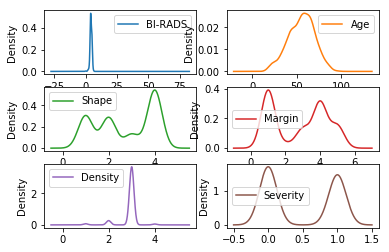

In [10]:
mammographic_new.plot(kind='density',subplots=True,sharex=False,layout=(3,2)) 
pyplot.show()

In [11]:

p=mammographic_new[['BI-RADS']].agg(['min','mean','max'])
print(p)

        BI-RADS
min    0.000000
mean   4.348279
max   55.000000


In [12]:
#first dataset
from sklearn.preprocessing import Imputer
imp_freq=Imputer(missing_values="NaN", strategy='most_frequent', axis=0)
imp_freq=imp_freq.fit(mammographic_new)
M=imp_freq.transform(mammographic_new.values)
print("Replacing data with the most frequent value of the line :\n%s" %M)

Replacing data with the most frequent value of the line :
[[  5.  67.   3.   5.   3.   1.]
 [  4.  43.   1.   1.   3.   1.]
 [  5.  58.   4.   5.   3.   1.]
 ..., 
 [  4.  64.   4.   5.   3.   0.]
 [  5.  66.   4.   5.   3.   1.]
 [  4.  62.   3.   3.   3.   0.]]


In [13]:
M=imp_freq.transform(M)
for i in range(len(M)):
        for j in range(len(M[0])):
            if(M[i][0]<=1):
             M[i][0]=1
             
            elif(M[i][0]<=2):
             M[i][0]=2
             
            elif(M[i][0]<=3):
             M[i][0]=3
             
            elif(M[i][0]<=4):
             M[i][0]=4
             
            elif(M[i][0]<=5):
             M[i][0]=5
             
            elif(M[i][0]>5):
             M[i][0]=5
print(M)

[[  5.  67.   3.   5.   3.   1.]
 [  4.  43.   1.   1.   3.   1.]
 [  5.  58.   4.   5.   3.   1.]
 ..., 
 [  4.  64.   4.   5.   3.   0.]
 [  5.  66.   4.   5.   3.   1.]
 [  4.  62.   3.   3.   3.   0.]]


In [14]:
mammographic_new1=pd.DataFrame(M, columns=['BI-RADS','Age','Shape','Margin',
                                           'Density','Severity'])

In [15]:
p=mammographic_new1[['BI-RADS']].agg(['min','mean','max'])
print(p)

       BI-RADS
min   1.000000
mean  4.289282
max   5.000000


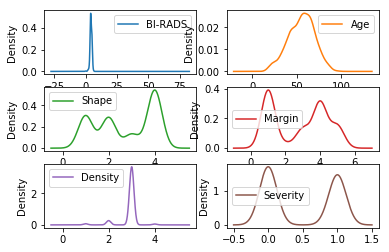

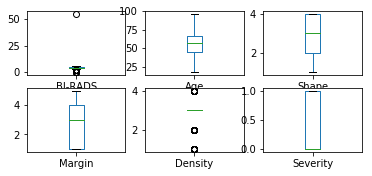

In [16]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
mammographic_new.plot(kind='density',subplots=True,layout=(3,2),sharex=False)
mammographic_new.plot(kind='box',subplots=True,layout=(3,3),
                      sharex=False,sharey=False) 
pyplot.show()



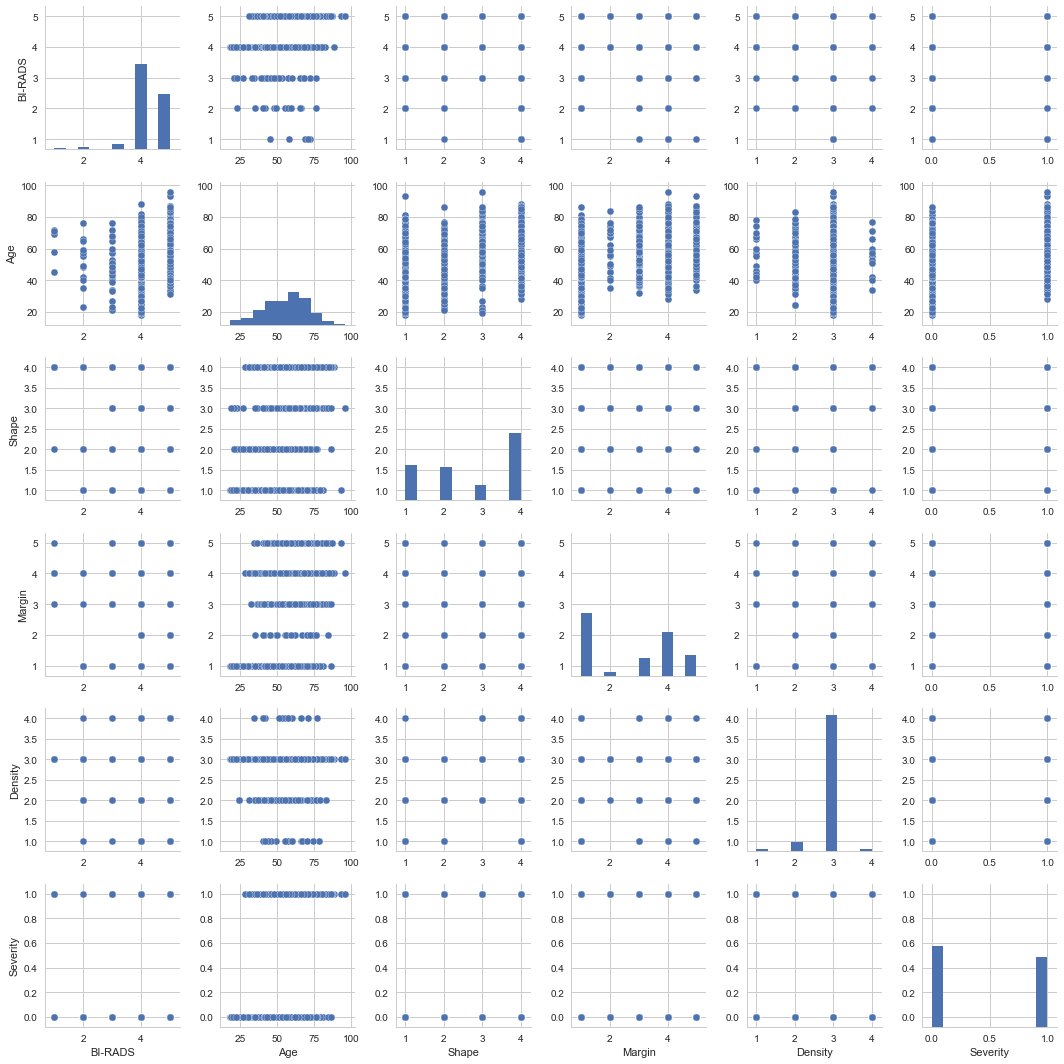

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols=['BI-RADS','Age','Shape','Margin','Density','Severity']
sns.pairplot(mammographic_new1[cols],size=2.5)
plt.show()

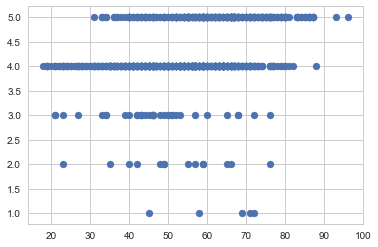

In [18]:

plt.scatter(mammographic_new1['Age'],mammographic_new1['BI-RADS'])
plt.show()

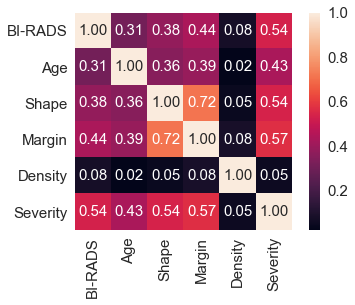

In [19]:
import numpy as np
col=['BI-RADS','Age','Shape','Margin','Density','Severity']
cm=np.corrcoef(mammographic_new1[col].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',
               annot_kws={'size': 15},yticklabels=col,xticklabels=col)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1.0
F1 Score 1.0
Confusion matrix, without normalization
[[155   0]
 [  0 134]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


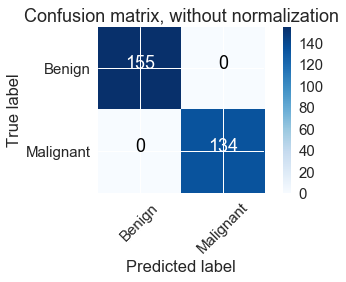

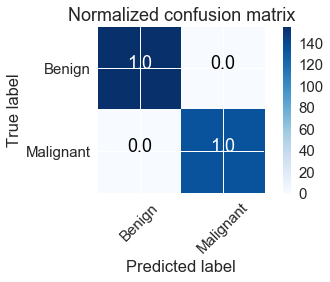

In [20]:
from sklearn import cross_validation
from sklearn.metrics import f1_score as fscorer
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeClassifier


x_train,x_test,y_train,y_test= cross_validation.train_test_split(mammographic_new1,
                                                    mammographic_new1['Severity'],
                                                 test_size=0.3,random_state=1)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def compute_cnf(classifier,x_test,y_test):
    cnf_matrix = confusion_matrix(classifier.predict(x_test),y_test)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'],
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'], normalize=True,
                      title='Normalized confusion matrix')

    plt.show()
    
 

def f1_score(classifier,x_test,y_test):
    return fscorer(classifier.predict(x_test),y_test)



classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)
print (classifier.score(x_test,y_test))

# Compute and plot confusion matrix
print("F1 Score", f1_score(classifier,x_test,y_test))
compute_cnf(classifier,x_test,y_test)
    
    

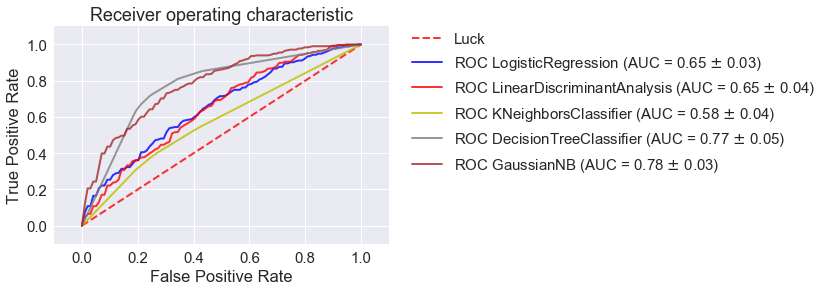

In [21]:
import numpy as np
from scipy import interp
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
# #############################################################################
# Data IO and generation

# Import  dataset 
X = mammographic_new1.values[300:, [1, 2]]
y = mammographic_new1['Severity'].values[300:]
#X = mammographic_new1
#y = mammographic_new1['Severity']
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
def ROC(classifier2,col):
    color=col
    classifier=classifier2
    
    tprs = []

    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    
    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
#    plt.plot(fpr, tpr, lw=1, alpha=0.3,
#            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1 
    
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    if(color=='b'):
     l='LogisticRegression'
    elif(color=="r"):
     l='LinearDiscriminantAnalysis'
    elif(color=='y'):
     l='KNeighborsClassifier'
    elif(color=='grey'):
     l='DecisionTreeClassifier'
    elif(color=='brown'):
     l='GaussianNB'
        
    plt.plot(mean_fpr, mean_tpr, color,
         label=r'ROC '+l+' (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
     #            label=r'$\pm$ 1 std. dev.')
col='b'
ROC(LogisticRegression(penalty='l2', C=0.001,  random_state=0),col)
col='r'
ROC(LinearDiscriminantAnalysis(),col)
col='y'
ROC(KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski',),col)
col='grey'
ROC(DecisionTreeClassifier(max_depth=1, criterion='entropy',random_state=0),col)
col='brown'
ROC(GaussianNB(),col)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.preprocessing import StandardScaler


X=mammographic_new1.values[:,0:5]
Y=mammographic_new1.values[:,5]
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                                    test_size=validation_size,
                                                 random_state=seed)
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('GradientBoost',GradientBoostingClassifier()))
models.append(('Random forest',RandomForestClassifier()))
models.append(('Extra tree',ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
	shuffleSplit = ShuffleSplit(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=shuffleSplit,
                                 scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
#valutate pipeline
ShuffleSplit=ShuffleSplit(n_splits=10,random_state=7)
results=cross_val_score(model,X,Y,cv=ShuffleSplit)
print(results.mean())


LR: 0.832184 (0.045457)
LDA: 0.841379 (0.040082)
KNN: 0.800000 (0.038191)
CART: 0.754023 (0.018676)
NB: 0.828736 (0.042217)
SVM: 0.793103 (0.034097)
AdaBoost: 0.808046 (0.035632)
GradientBoost: 0.812644 (0.037791)
Random forest: 0.787356 (0.020074)
Extra tree: 0.772414 (0.029885)
0.761855670103


In [23]:
#secondo dataset
mammographic_new2=mammographic_new.dropna()
print(mammographic_new2.count())

BI-RADS     830
Age         830
Shape       830
Margin      830
Density     830
Severity    830
dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.preprocessing import StandardScaler


X=mammographic_new2.values[:,0:5]
Y=mammographic_new2.values[:,5]
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                             test_size=validation_size,
                                                 random_state=seed)
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('GradientBoost',GradientBoostingClassifier()))
models.append(('Random forest',RandomForestClassifier()))
models.append(('Extra tree',ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
	shuffleSplit = ShuffleSplit(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=shuffleSplit,
                                 scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
#valutate pipeline
ShuffleSplit=ShuffleSplit(n_splits=10,random_state=7)
results=cross_val_score(model,X,Y,cv=ShuffleSplit)
print(results.mean())

LR: 0.833333 (0.032249)
LDA: 0.810667 (0.032551)
KNN: 0.816000 (0.042500)
CART: 0.764000 (0.035302)
NB: 0.840000 (0.035277)
SVM: 0.816000 (0.036172)
AdaBoost: 0.838667 (0.043184)
GradientBoost: 0.842667 (0.034150)
Random forest: 0.812000 (0.035503)
Extra tree: 0.802667 (0.043737)
0.771084337349


In [ ]:

M.astype(int)        
import sqlite3

con=sqlite3.connect(database="example DB")


list=[]
c=con.cursor()

#Creazione tabella
c.execute('CREATE TABLE mammographic_dataset2 (int BIRADS, Age int, Shape int, Margin int, Density int,Severity int)')

#Caricamento dataset sul database
for i in range(len(M)):
        c.execute('INSERT INTO "mammographic_dataset2" VALUES(?,?,?,?,?,?)',(M[i][0],
                                        M[i][1],M[i][2],M[i][3],M[i][4],M[i][5]))

#salvatoaggio stato del DB -> 'commit'
con.commit()


#Print database instances with severity = 1 and age> 70
print("Print database instances with severity = 1 and age> 70")
for row in c.execute('SELECT * FROM mammographic_dataset2 WHERE Severity=1 AND Age>70'):
    print(row)

#sPrint database instances with severity = 1 and age> 70
print("Print database instances with severity = 1 and age> 70")
for row in c.execute('SELECT COUNT(Severity) FROM mammographic_dataset2 WHERE Severity=1 AND Age>70'):
    print(row)
    

for row in c.execute('SELECT * FROM mammographic_dataset2'):    
    list.append(row)


con.close()

print("List:")
print(list)

Print database instances with severity = 1 and age> 70
(5, 74, 1, 5, 3, 1)
(5, 76, 1, 4, 3, 1)
(5, 75, 4, 5, 3, 1)
(5, 80, 3, 5, 3, 1)
(5, 74, 4, 4, 3, 1)
(5, 72, 4, 3, 3, 1)
(5, 74, 1, 1, 2, 1)
(4, 73, 3, 4, 3, 1)
(4, 80, 4, 4, 3, 1)
(5, 71, 4, 4, 3, 1)
(5, 75, 4, 3, 3, 1)
(5, 80, 4, 5, 3, 1)
(4, 71, 4, 4, 3, 1)
(5, 71, 4, 4, 4, 1)
(5, 87, 4, 5, 3, 1)
(5, 86, 4, 5, 3, 1)
(4, 71, 3, 3, 3, 1)
(5, 74, 4, 5, 3, 1)
(5, 81, 3, 4, 3, 1)
(5, 79, 4, 3, 3, 1)
(5, 85, 4, 4, 3, 1)
(5, 72, 4, 5, 3, 1)
(5, 76, 4, 5, 3, 1)
(5, 79, 4, 4, 3, 1)
(5, 80, 4, 3, 3, 1)
(5, 76, 4, 3, 3, 1)
(5, 72, 4, 4, 3, 1)
(5, 76, 4, 4, 3, 1)
(5, 73, 4, 4, 3, 1)
(5, 77, 4, 5, 3, 1)
(5, 71, 4, 3, 3, 1)
(5, 76, 4, 2, 3, 1)
(5, 72, 4, 5, 3, 1)
(5, 75, 4, 4, 3, 1)
(5, 79, 1, 1, 3, 1)
(4, 77, 4, 4, 3, 1)
(5, 80, 4, 4, 3, 1)
(4, 77, 4, 4, 3, 1)
(4, 71, 2, 1, 3, 1)
(4, 71, 4, 2, 3, 1)
(4, 72, 4, 4, 3, 1)
(5, 85, 3, 5, 3, 1)
(5, 75, 4, 3, 3, 1)
(5, 87, 4, 4, 3, 1)
(5, 78, 4, 4, 3, 1)
(5, 83, 4, 4, 3, 1)
(4, 88, 4, 4, 3, 1)
(5, 7

In [ ]:
import pymysql.cursors
connection=pymysql.connect(host='sql10.freemysqlhosting.net', user='sql10220140', passwd='4us7UNsKPJ', db='sql10220140', port=3306)
try:
    with connection.cursor() as cursor:
       
        sql='CREATE TABLE mammographic_dstable1 (BIRADS int, Age int, Shape int, Margin int, Density int,Severity int)'
        cursor.execute(sql)
        
        cursor.execute('INSERT INTO mammographic_dstable1 VALUES(1,83,5,3,2,1)')
        cursor.execute('INSERT INTO mammographic_dstable1 VALUES(2,74,5,2,3,1)')
        cursor.execute('INSERT INTO mammographic_dstable1 VALUES(4,87,4,3,3,0)')
        #salvataggio stato del DB -> 'commit'
        connection.commit()
        
	
        print("Print database instances with severity = 1 ")
        cursor.execute('SELECT COUNT(Severity) FROM mammographic_dstable1 WHERE Severity=1')
        result=cursor.fetchone()
        print(result)
        
                
finally:
        cursor.close()
        connection.close()